In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from prophet import Prophet



In [ ]:

df = pd.read_csv('/content/household_power_consumption.csv', delimiter= ';')

<ipython-input-2-db98f6fc674a>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.csv', delimiter= ';')


In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.shape

(2075259, 9)

In [ ]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:
# convert the `Date` column to datetime64 datatype
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-75-ba75ec2b7eb4>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# convert all the numeric columns to float datatype
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors= 'coerce')

In [ ]:
# set the `Date` column as index in the dataframe
df.set_index("Date", inplace= True)

In [ ]:
df.dtypes

Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
# Forward-fill missing values
df_cleaned = df.fillna(method='ffill')

# Check for missing values again
df_cleaned.isnull().sum()


Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
  df_hourly = df_cleaned.resample('H').sum()

In [ ]:
df_hourly.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16 00:00:00,17:24:0017:25:0017:26:0017:27:0017:28:0017:29:...,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-16 01:00:00,0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 02:00:00,0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 03:00:00,0,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2006-12-16 04:00:00,0,0.000,0.000,0.00,0.0,0.0,0.0,0.0


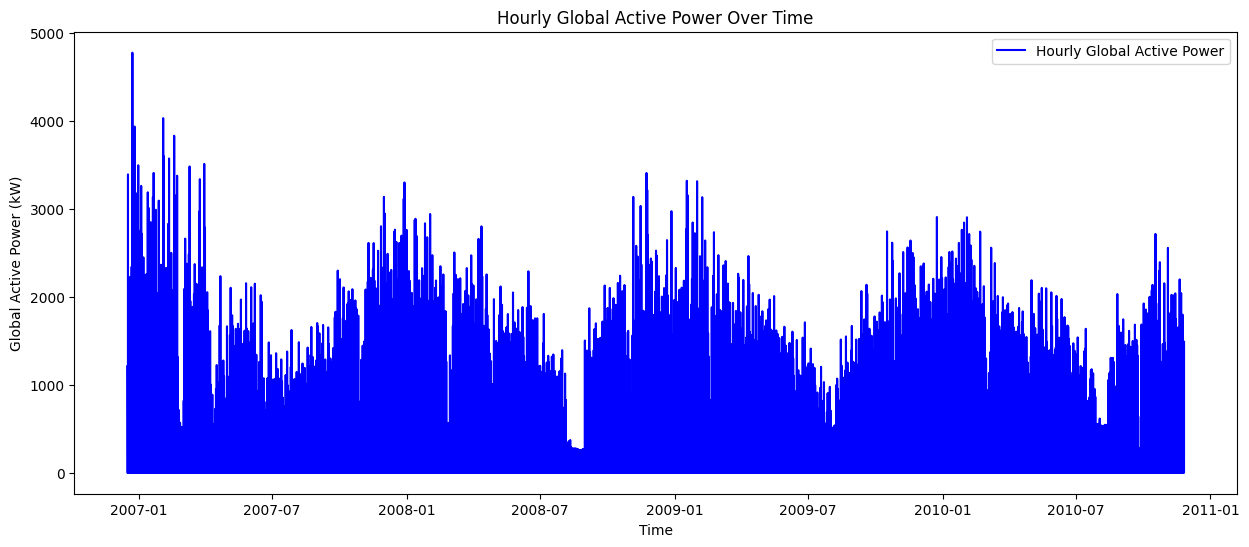

In [ ]:
# Plot the hourly global_active_power
plt.figure(figsize=(15, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], label='Hourly Global Active Power', color='blue')
plt.title('Hourly Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

In [ ]:
# to calculate Pearson correlation coefficient and print the result to 3 decimal places
correlation_coefficient = df_cleaned['Global_active_power'].corr(df_cleaned['Voltage'])
print(f"Pearson Correlation Coefficient between the global_active_power and voltage is : {correlation_coefficient:.3f}")

Pearson Correlation Coefficient between the global_active_power and voltage is : -0.396


In [ ]:
# Calculate Pearson correlation coefficient
pcc_volt_intensity = df_cleaned['Voltage'].corr(df_cleaned['Global_intensity'])

# result to 2 decimal places
print(f"Pearson Correlation Coefficient between Voltage and Global_intensity is : {pcc_volt_intensity:.2f}")


Pearson Correlation Coefficient between Voltage and Global_intensity is : -0.41


In [ ]:
# downsample the dataset on daily basis
df_daily = df_cleaned.resample("D").sum()

In [ ]:
df_daily.reset_index(inplace= True)

In [ ]:
# check for the number rows again after the downsampling
df_daily.shape[0]

1442

In [ ]:
# split the dataset into the training and the test sets
train_ratio = df_daily.shape[0] - 300
train_set = df_daily[:train_ratio] # x-300 where x is the number of samples
test_set = df_daily[train_ratio:]  # last 300

In [ ]:
# check for the training and the test sets number of rows
print(f"Training set is {train_set.shape[0]} samples")
print(f"Test set is {test_set.shape[0]} samples")

Training set is 1142 samples
Test set is 300 samples


In [ ]:
from prophet import Prophet

In [ ]:
train_set = train_set.rename(columns= {'Date' : 'ds', 'Global_active_power' : 'y'})
test_set = test_set.rename(columns= {'Date' : 'ds', 'Global_active_power' : 'y'})

model = Prophet()
model.fit(train_set[['ds', 'y']])
forecast = model.predict(test_set[['ds', 'y']])
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2oq8_qgi/gfgagdxz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2oq8_qgi/qkwrtd6i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73396', 'data', 'file=/tmp/tmp2oq8_qgi/gfgagdxz.json', 'init=/tmp/tmp2oq8_qgi/qkwrtd6i.json', 'output', 'file=/tmp/tmp2oq8_qgi/prophet_model7i3qbq51/prophet_model-20240617211322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:13:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:13:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,1522.499286,1899.445054,2988.622464,1522.499286,1522.499286,909.738421,909.738421,909.738421,210.643678,210.643678,210.643678,699.094743,699.094743,699.094743,0.0,0.0,0.0,2432.237708
1,2010-02-01,1522.450200,1520.420948,2602.531055,1522.450200,1522.450200,534.339480,534.339480,534.339480,-162.600237,-162.600237,-162.600237,696.939717,696.939717,696.939717,0.0,0.0,0.0,2056.789680
2,2010-02-02,1522.401114,1598.945175,2754.034278,1522.401114,1522.401114,670.861467,670.861467,670.861467,-19.427511,-19.427511,-19.427511,690.288977,690.288977,690.288977,0.0,0.0,0.0,2193.262581
3,2010-02-03,1522.352028,1617.531262,2779.353915,1522.352028,1522.352028,665.246806,665.246806,665.246806,-13.728763,-13.728763,-13.728763,678.975568,678.975568,678.975568,0.0,0.0,0.0,2187.598834
4,2010-02-04,1522.302942,1463.132926,2555.922359,1522.302942,1522.302942,484.374478,484.374478,484.374478,-178.555854,-178.555854,-178.555854,662.930332,662.930332,662.930332,0.0,0.0,0.0,2006.677420


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [ ]:
# RMSE
np.sqrt(mean_squared_error(test_set['y'], forecast['yhat']))

401.6085240222927

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-01-31,2432.237708,1899.445054,2988.622464,1522.499286,1522.499286,1522.499286
1,2010-02-01,2056.789680,1520.420948,2602.531055,1522.450200,1522.450200,1522.450200
2,2010-02-02,2193.262581,1598.945175,2754.034278,1522.401114,1522.401114,1522.401114
3,2010-02-03,2187.598834,1617.531262,2779.353915,1522.352028,1522.352028,1522.352028
4,2010-02-04,2006.677420,1463.132926,2555.922359,1522.302942,1522.302942,1522.302942
...,...,...,...,...,...,...,...
295,2010-11-22,1899.039383,1329.911656,2444.820926,1508.018896,1504.914244,1511.273434
296,2010-11-23,2048.253904,1473.494901,2597.109550,1507.969810,1504.848996,1511.243821
297,2010-11-24,2056.282506,1504.298958,2606.480752,1507.920724,1504.783749,1511.207176
298,2010-11-25,1890.309751,1332.827774,2435.254774,1507.871638,1504.718658,1511.160096


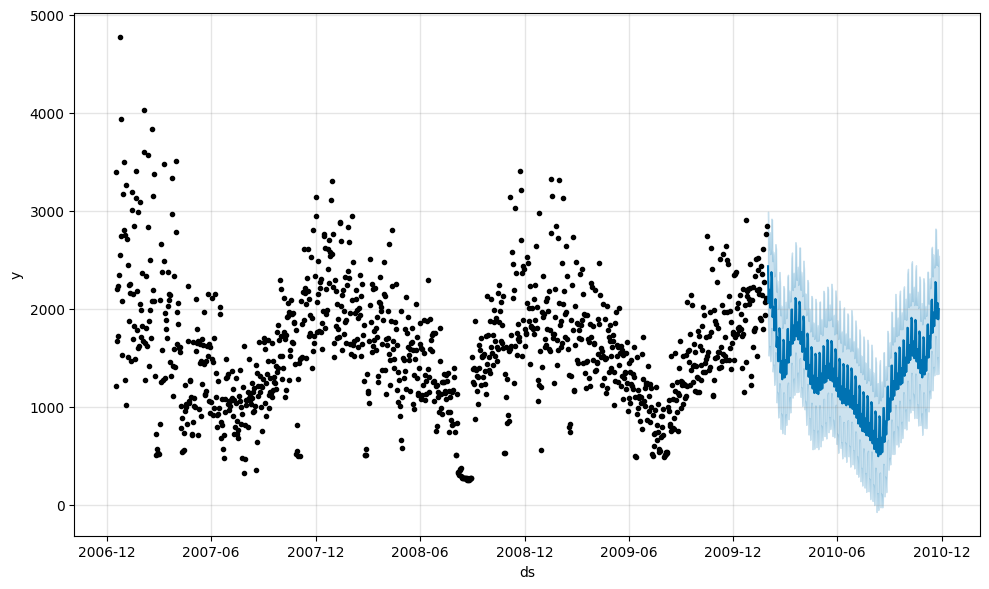

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
old_columns = ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']
new_columns = ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']

train_set = train_set.rename(columns= dict(zip(old_columns, new_columns)))
test_set = test_set.rename(columns= dict(zip(old_columns, new_columns)))

In [ ]:
model = Prophet()

In [ ]:
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [ ]:
model.fit(train_set[['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']])
forecast = model.predict(test_set[['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2oq8_qgi/25fzau52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2oq8_qgi/ql84y4_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29938', 'data', 'file=/tmp/tmp2oq8_qgi/25fzau52.json', 'init=/tmp/tmp2oq8_qgi/ql84y4_c.json', 'output', 'file=/tmp/tmp2oq8_qgi/prophet_modell2q2sp6f/prophet_model-20240617211918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:19:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:19:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,1616.589839,1793.597795,1826.829264,1616.589839,1616.589839,0.823284,0.823284,0.823284,1.197358,...,0.337935,0.337935,0.337935,8.833681,8.833681,8.833681,0.0,0.0,0.0,1809.715092
1,2010-02-01,1616.680513,1688.189136,1722.571700,1616.680513,1616.680513,9.390946,9.390946,9.390946,1.294015,...,-0.300164,-0.300164,-0.300164,9.374265,9.374265,9.374265,0.0,0.0,0.0,1705.033307
2,2010-02-02,1616.771187,2141.697262,2175.858641,1616.771187,1616.771187,8.220529,8.220529,8.220529,1.167901,...,-1.395724,-1.395724,-1.395724,9.940965,9.940965,9.940965,0.0,0.0,0.0,2158.401303
3,2010-02-03,1616.861861,2888.611777,2923.091693,1616.861861,1616.861861,-1.409016,-1.409016,-1.409016,0.769320,...,1.023739,1.023739,1.023739,10.525630,10.525630,10.525630,0.0,0.0,0.0,2905.981041
4,2010-02-04,1616.952535,2314.386275,2347.209744,1616.952535,1616.952535,6.262499,6.262499,6.262499,0.648116,...,-0.140910,-0.140910,-0.140910,11.120133,11.120133,11.120133,0.0,0.0,0.0,2330.861939


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-01-31,1809.715092,1793.597795,1826.829264,1616.589839,1616.589839,1616.589839
1,2010-02-01,1705.033307,1688.189136,1722.571700,1616.680513,1616.680513,1616.680513
2,2010-02-02,2158.401303,2141.697262,2175.858641,1616.771187,1616.771187,1616.771187
3,2010-02-03,2905.981041,2888.611777,2923.091693,1616.861861,1616.861861,1616.861861
4,2010-02-04,2330.861939,2314.386275,2347.209744,1616.952535,1616.952535,1616.952535
...,...,...,...,...,...,...,...
295,2010-11-22,2103.998358,1910.423899,2305.504321,1643.338683,1454.153089,1844.380771
296,2010-11-23,1645.023352,1455.952785,1842.347167,1643.429357,1453.209860,1845.362577
297,2010-11-24,1853.361592,1659.064910,2053.986370,1643.520031,1452.055747,1846.338366
298,2010-11-25,1474.929848,1277.144596,1670.113075,1643.610705,1451.697116,1847.308138


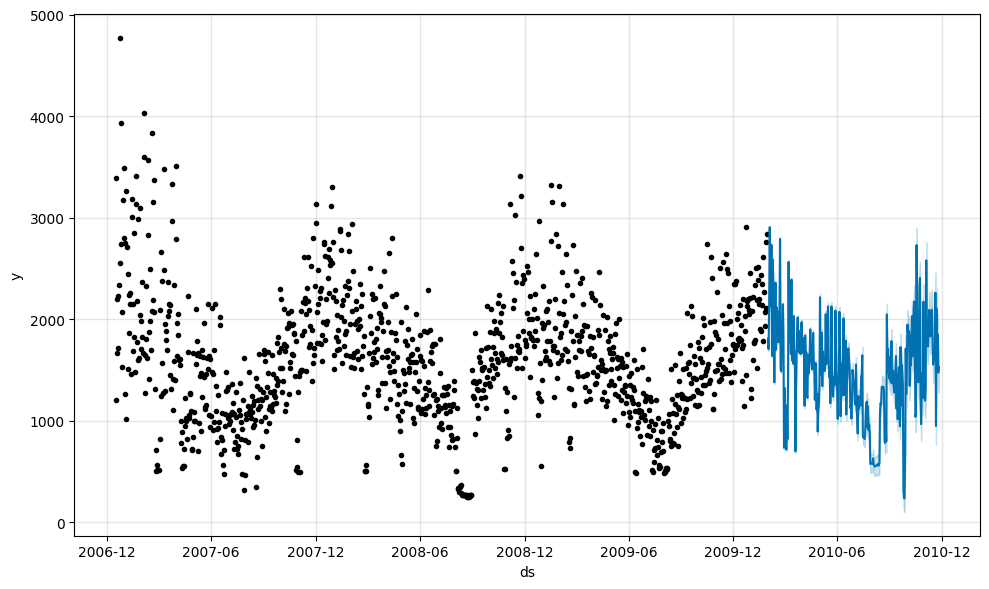

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
# RMSE
np.sqrt(mean_squared_error(test_set['y'], forecast['yhat']))

33.82897973979431